In [181]:
#model for ASL project
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import itertools
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
import tensorflow as tf
import time
from tensorflow.keras.callbacks import Callback

#CHANGE FOR FINAL SUBMISSION TO BE ABLE TO RUN
csv_file_path_train = '/Users/sofiautoft/ML/sign_mnist_train.csv'

train_data = pd.read_csv(csv_file_path_train)

print(train_data.shape)
train_data.head()

(27455, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [182]:
csv_file_path_test = '/Users/sofiautoft/ML/sign_mnist_test.csv'

test_data = pd.read_csv(csv_file_path_test)

print(test_data.shape)
test_data.head()

(7172, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [183]:
# locate labels into y_train variable
Y_train = train_data["label"]
# get rid of label
X_train = train_data.drop(labels = ["label"],axis = 1) 

#repeat for test data
Y_test = test_data["label"]
X_test = test_data.drop(labels = ["label"],axis = 1) 

17    1294
16    1279
11    1241
22    1225
5     1204
18    1199
3     1196
14    1196
19    1186
23    1164
8     1162
20    1161
13    1151
2     1144
0     1126
24    1118
10    1114
6     1090
15    1088
21    1082
12    1055
7     1013
1     1010
4      957
Name: label, dtype: int64

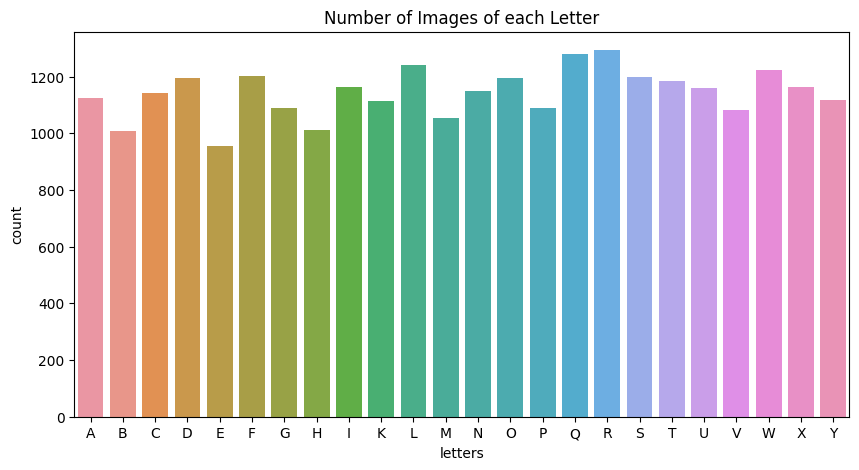

In [184]:
num_to_letters = {}
for num in range(0, 25):
    letter = chr(num + 65)
    num_to_letters[num] = letter

Y_train_labels = [num_to_letters[num] for num in Y_train]

Y_train_labels = sorted(Y_train_labels)

#visualize number of letters classes
plt.figure(figsize=(10,5))
g = sns.countplot(x = Y_train_labels)
plt.title("Number of Images of each Letter")
plt.xlabel("letters")
Y_train.value_counts()
#no data for 'J' = 9 and 'Z' 25 since they are motions


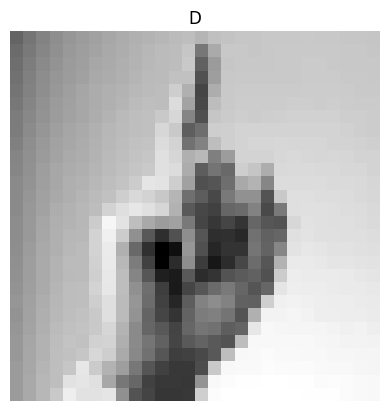

In [185]:
#plot a sample
img = X_train.iloc[0].values
img = img.reshape((28,28))
plt.imshow(img, cmap='gray')
key = train_data.iloc[0,0]
plt.title(num_to_letters[key])
plt.axis("off")
plt.show()

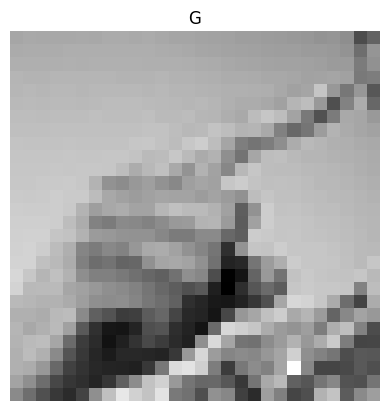

In [186]:
img = X_train.iloc[1].values
img = img.reshape((28,28))
plt.imshow(img, cmap='gray')
key = train_data.iloc[1,0]
plt.title(num_to_letters[key])
plt.axis("off")
plt.show()

In [187]:
#normalize the data (must be between 0 and 1 to feed our model)
X_train = X_train / 255.0
X_test = X_test / 255.0
print("x_train shape: ",X_train.shape)
print("test shape: ",X_test.shape)

x_train shape:  (27455, 784)
test shape:  (7172, 784)


In [188]:
#reshape the data into 28x28 images
X_train = X_train.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)
print("x_train shape: ",X_train.shape)
print("test shape: ",X_test.shape)

x_train shape:  (27455, 28, 28, 1)
test shape:  (7172, 28, 28, 1)


In [189]:
#One Hot Encoding
Y_train_encoded = to_categorical(Y_train, num_classes = 25)
Y_test_encoded = to_categorical(Y_test, num_classes=25)

In [190]:
#define the model
model = Sequential()

model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
#model.add(Dropout(0.25)) #accuracy = 0.8454 0.8390 0.8214
model.add(Dropout(0.30)) #accuracy = 0.8951 0.0.8740 0.8664 
#model.add(Dropout(0.35)) #accuracy = 0.8404 0.8047 0.8021

model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
#model.add(Dropout(0.25)) #accuracy = 0.8454 0.8390 0.8214
model.add(Dropout(0.30)) #accuracy = 0.8951 0.0.8740 0.8664
#model.add(Dropout(0.35)) #accuracy = 0.8404 0.8047 0.8021


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5)) # choosing earlier dropout rates of 0.3, accuracy = 0.8678
#model.add(Dropout(0.3)) # choosing earlier dropout rates of 0.3, accuracy = 0.8067
#model.add(Dropout(0.6)) # choosing earlier dropout rates of 0.3, accuracy = 0.8162

model.add(Dense(25, activation = "softmax"))

In [191]:
#optimze
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

#compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

#calculate the epochs & batch size
data = X_train.shape[0]
epochs = 19 #whole number options = 1, 5, 17, 19, 85, 95
batch_size = int(data / epochs)

In [192]:
#data augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False, 
        rotation_range=5,  #randomly rotate images 5 degrees
        zoom_range = 0.1, #randomly zoom in 10%
        width_shift_range=0.1,  #randomly shift images horizontally 10%
        height_shift_range=0.1,  #randomly shift images vertically 10%
        horizontal_flip=False,  #randomly flip images set to false - could this affect the sign if True (?)
        vertical_flip=False)  #randomly flip images set to false - could this affect the sign if True (?)

datagen.fit(X_train)

In [193]:
X_train.shape
Y_train_encoded.shape

(27455, 25)

In [194]:
#keep track of how long training takes
class TrainingTimeCallback(Callback):
    def on_train_begin(self, logs=None):
        self.start_time = time.time()

    def on_train_end(self, logs=None):
        end_time = time.time()
        training_duration = end_time - self.start_time
        print("Training duration:", training_duration, "seconds")

# Create an instance of the custom callback
time_callback = TrainingTimeCallback()

In [195]:
#fit the model
steps_per_epoch = int(X_train.shape[0] / batch_size)

history = model.fit(datagen.flow(X_train, Y_train_encoded, batch_size=batch_size), epochs=epochs, 
                    validation_data=(X_test, Y_test_encoded), steps_per_epoch=steps_per_epoch, callbacks=[time_callback])

Epoch 1/19
19/19 [==============================] - 9s 448ms/step - loss: 3.2278 - accuracy: 0.0467 - val_loss: 3.1957 - val_accuracy: 0.0452
Epoch 2/19
19/19 [==============================] - 8s 418ms/step - loss: 3.1679 - accuracy: 0.0655 - val_loss: 3.1494 - val_accuracy: 0.1630
Epoch 3/19
19/19 [==============================] - 8s 413ms/step - loss: 3.0991 - accuracy: 0.0957 - val_loss: 3.0154 - val_accuracy: 0.2616
Epoch 4/19
19/19 [==============================] - 8s 413ms/step - loss: 2.9398 - accuracy: 0.1431 - val_loss: 2.6892 - val_accuracy: 0.3426
Epoch 5/19
19/19 [==============================] - 8s 431ms/step - loss: 2.7093 - accuracy: 0.1994 - val_loss: 2.3447 - val_accuracy: 0.4380
Epoch 6/19
19/19 [==============================] - 8s 410ms/step - loss: 2.5089 - accuracy: 0.2441 - val_loss: 2.1055 - val_accuracy: 0.4748
Epoch 7/19
19/19 [==============================] - 8s 410ms/step - loss: 2.3422 - accuracy: 0.2806 - val_loss: 1.8615 - val_accuracy: 0.5332
Epoch 

In [196]:
#Save trained model
""" from tensorflow.keras.models import save_model

model.save("my_model.h5")  # Save the model to a file named "my_model.h5"
 """

' from tensorflow.keras.models import save_model\n\nmodel.save("my_model.h5")  # Save the model to a file named "my_model.h5"\n '